In [2]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "MetroTransit routes 2020.csv"

# Read with Pandas
metrotransit2020_df = pd.read_csv(metrotransit_csv)
metrotransit2020_df.head()
# metrotransit_df["Route Classification"].unique()

,week,week_of,srv,route_class,line_id,dir,trip_cnt,obs_trips,seq,site_id,location,ons,offs
0,5,01/27/20,WK,CoreLoc,10,North,96,96.0,1.0,19337,Leamington Ramp & Lower - Gate #7,114.650000,24.766667
1,5,01/27/20,WK,CoreLoc,10,North,96,96.0,2.0,19277,3rd Ave S & 11th St S,10.366667,2.733333
2,5,01/27/20,WK,CoreLoc,10,North,96,96.0,3.0,41911,2nd Ave S & Convention Center,35.000000,1.166667
3,5,01/27/20,WK,CoreLoc,10,North,96,96.0,4.0,17988,Nicollet Mall & Alice Rainville,119.566667,3.533333
4,5,01/27/20,WK,CoreLoc,10,North,96,96.0,5.0,17990,Nicollet Mall & 11th St S,140.816667,4.050000


<IPython.core.display.Javascript object>


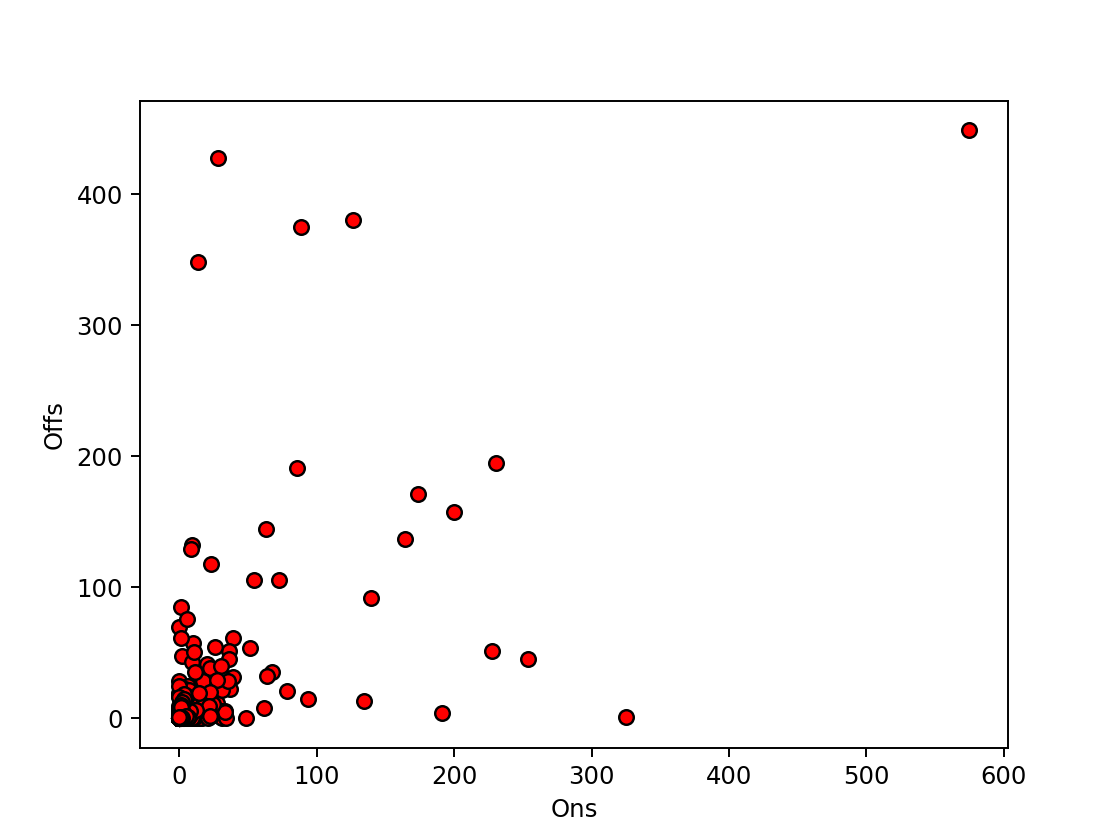

<function matplotlib.pyplot.show(*args, **kw)>

In [4]:
sample_df = metrotransit2020_df.sample(n = 500)

ons = sample_df["ons"]
offs = sample_df["offs"]

plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")
plt.show

In [ ]:
# Merge Fall 2019 and 2020 data on "location"
